### James Cooper | CSC 529 | Assignment 1

#### Wine Dataset Analysis using Decision Trees, Naive Bayes, KNN

In [2]:
cd "C:/Users/James Cooper/Desktop/DePaul/Advanced Data Mining/Homework1"

C:\Users\James Cooper\Desktop\DePaul\Advanced Data Mining\Homework1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

### Exploratory Analysis

In [4]:
dat = pd.read_csv("Wine_data.csv", sep=',')

In [5]:
dat.head(5)

,Classes,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonfavanoid_phenols,Proanthocyanins,Color Intensity,Hue,OD280_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Here we can see that a few variables are somewhat correlated - such as Proline being very positively correlated with Alcohol, Total Phenols is highly correlated with Flavanoids and OD280 Diluted Wines, Hue and Malic Acid seem to be negatively correlated

In [6]:
#Run a correlation matrix on the data 
dat.corr()

,Classes,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonfavanoid_phenols,Proanthocyanins,Color Intensity,Hue,OD280_diluted_wines,Proline
Classes,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonfavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [7]:
dat.columns

Index([u'Classes', u'Alcohol', u'Malic_Acid', u'Ash', u'Alcalinity_ash',
       u'Magnesium', u'Total_phenols', u'Flavanoids', u'Nonfavanoid_phenols',
       u'Proanthocyanins', u'Color Intensity', u'Hue', u'OD280_diluted_wines',
       u'Proline'],
      dtype='object')

In [5]:
dat['Classes'] = dat['Classes'].astype(np.int).astype('category')

We have no missing values

In [9]:
dat.isnull().any()

Classes                False
Alcohol                False
Malic_Acid             False
Ash                    False
Alcalinity_ash         False
Magnesium              False
Total_phenols          False
Flavanoids             False
Nonfavanoid_phenols    False
Proanthocyanins        False
Color Intensity        False
Hue                    False
OD280_diluted_wines    False
Proline                False
dtype: bool

In [12]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Classes                178 non-null category
Alcohol                178 non-null float64
Malic_Acid             178 non-null float64
Ash                    178 non-null float64
Alcalinity_ash         178 non-null float64
Magnesium              178 non-null int64
Total_phenols          178 non-null float64
Flavanoids             178 non-null float64
Nonfavanoid_phenols    178 non-null float64
Proanthocyanins        178 non-null float64
Color Intensity        178 non-null float64
Hue                    178 non-null float64
OD280_diluted_wines    178 non-null float64
Proline                178 non-null int64
dtypes: category(1), float64(11), int64(2)
memory usage: 18.4 KB


We can see here that max and min values as well as mean values have a high variance amongst the variables - this being due to different scales. The data should be scaled for classification to remove the influence of larger scales such as Proline and Magnesium

In [13]:
dat.describe()

,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonfavanoid_phenols,Proanthocyanins,Color Intensity,Hue,OD280_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We can drop classes from the dataset and turn them into the the label array for classification

In [6]:
data = dat.drop('Classes', 1).values
classes = dat['Classes'].astype('int').values

In [11]:
data.shape

(178L, 13L)

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
data_scaled

array([[ 0.84210526,  0.1916996 ,  0.57219251, ...,  0.45528455,
         0.97069597,  0.56134094],
       [ 0.57105263,  0.2055336 ,  0.4171123 , ...,  0.46341463,
         0.78021978,  0.55064194],
       [ 0.56052632,  0.3201581 ,  0.70053476, ...,  0.44715447,
         0.6959707 ,  0.64693295],
       ..., 
       [ 0.58947368,  0.69960474,  0.48128342, ...,  0.08943089,
         0.10622711,  0.39728959],
       [ 0.56315789,  0.36561265,  0.54010695, ...,  0.09756098,
         0.12820513,  0.40085592],
       [ 0.81578947,  0.66403162,  0.73796791, ...,  0.10569106,
         0.12087912,  0.20114123]])

In [8]:
data_scaled.shape

(178L, 13L)

In [14]:
type(data)

numpy.ndarray

In [31]:
classes[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [32]:
classes.shape

(178L,)

In [9]:
np.unique(classes, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48], dtype=int64))

### 1. Data Visualization

#### a. Select randomly two variables and plot the data using different colors/signs to plot the points belonging to different three classes. What can you say about the class separability in this space?

First it is interesting to explore the relationships of all variables at once in a scatter matrix with color identifying the 3 classes. This way we get an idea of how the classes break out when comparing each variable against another.

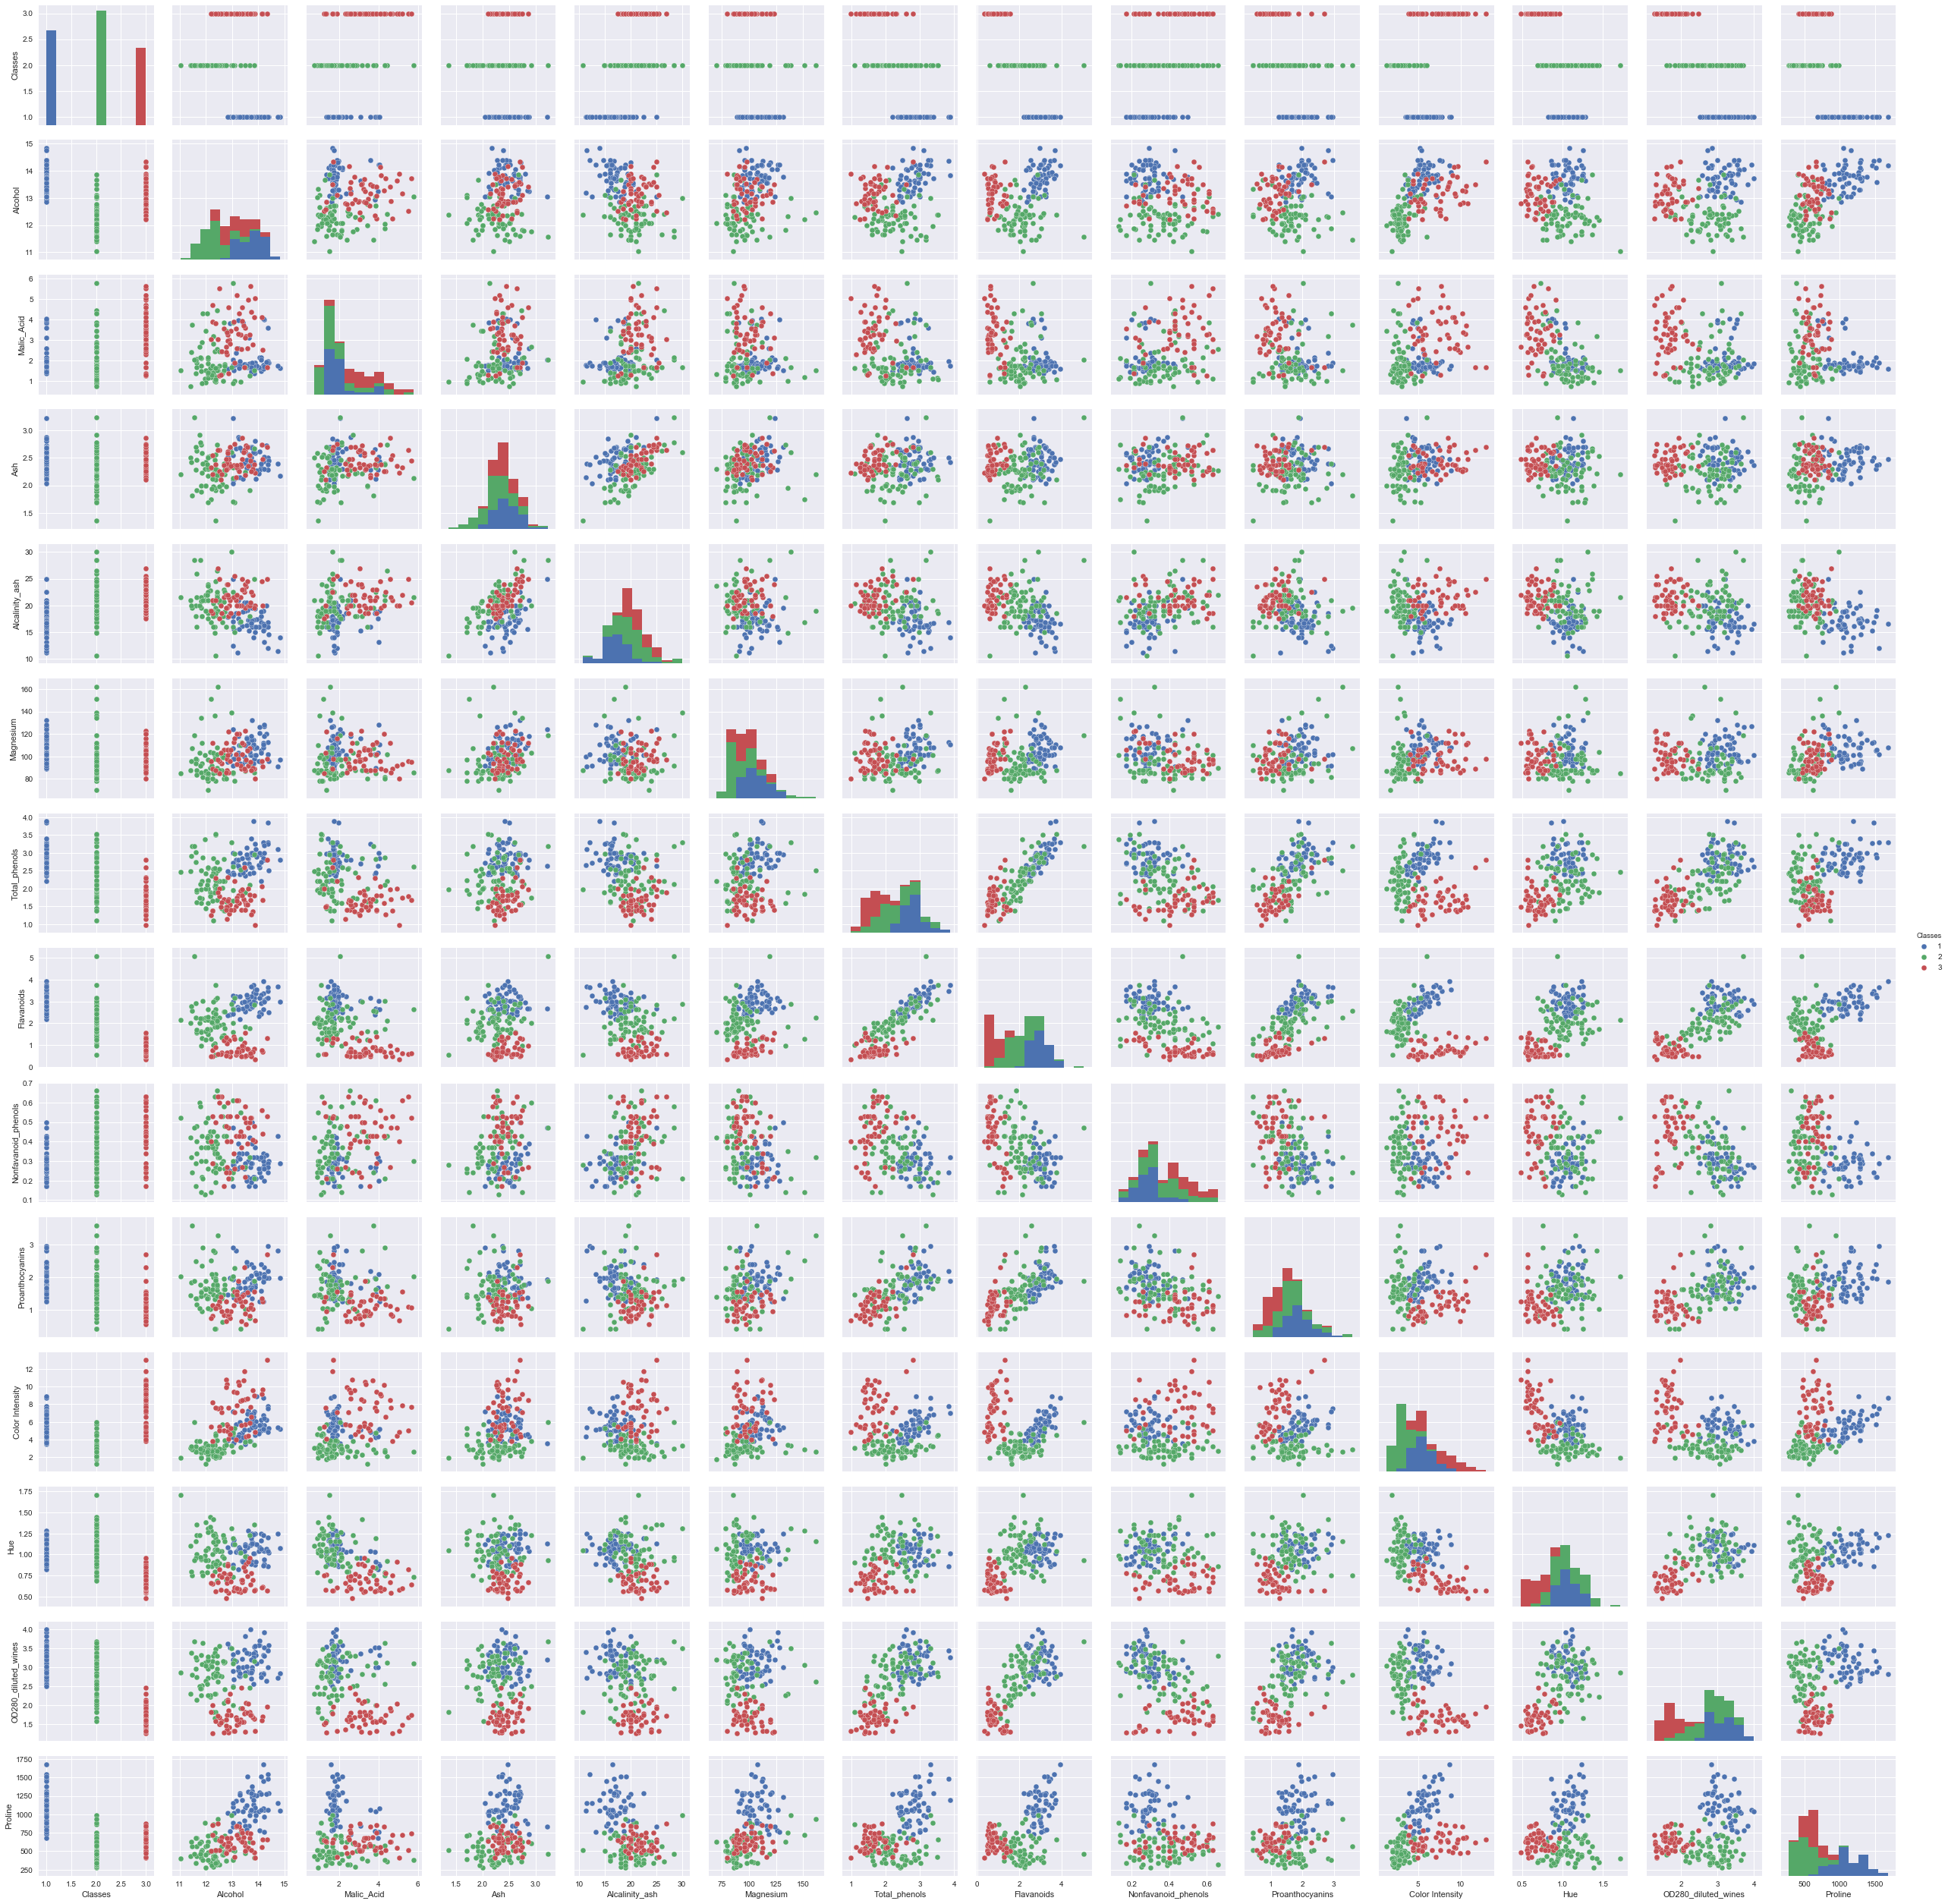

In [75]:
sns.pairplot(dat, hue='Classes')

Here are two separate plots of two variables plotted against each other. We can see that Alcohol plotted against Magnesium do break classes out somewhat with higher alcohol content and higher magnesium content generally leaning towards class 1, while lower Alcohol and lower Magnesium trend towards class 2. There do contain quite a few outliers in the case of class 2 with very high Magnesium content. Class 3 is generally in between the two other classes.

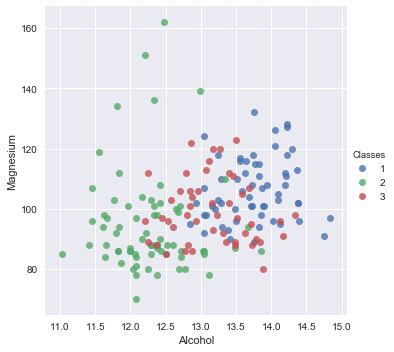

In [94]:
sns.lmplot('Alcohol', 'Magnesium', dat, hue='Classes', fit_reg=False)

Once again we see somewhat of a trend with class 3 genearlly being low on Proanthocyanins and Total Phenols. The classes are not as distinct in this case, but do show some separability. 

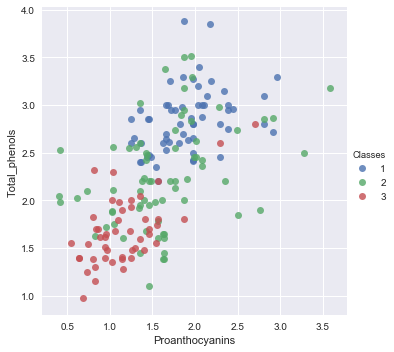

In [97]:
sns.lmplot('Proanthocyanins', 'Total_phenols', dat, hue='Classes', fit_reg=False)

#### b. Repeat part a. but this time using two variables that you found to be the most relevant for the classification process.  Explain the approach you applied to select these two variables and include the analysis you performed in your answer. 

For the classificaiton process, we need to figure out what the best features would be to split the data
based on classes of wine, this time using more concrete metrics. In order to do this I am using the SelectKBest function and will utilize the chi2 measurement between the data and the class labels in sklearn.These will choose the predefined number of 
features (2 in this instance) that will be used to find the 2 best features or highest chi2 statistic for features 
that are non-randomly related to the class. We will take the highest scores that divide the data into 
distinct classes. 

In [52]:
k = 2

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sel = SelectKBest(chi2, k=2)
sel.fit(data_scaled, classes)

SelectKBest(k=2, score_func=<function chi2 at 0x00000000340DE518>)

In [19]:
sel.transform(data_scaled).shape

(178L, 2L)

In [20]:
sel.scores_

array([  9.45400066,   8.11858304,   0.9346697 ,   3.31958248,
         1.64131331,   9.40177031,  16.05097687,   5.34608154,
         3.9813523 ,  12.45315712,   8.44940247,  16.67767772,  18.79203469])

In [104]:
sel.scores_.shape

(13L,)

So we can see below that using the SelectKbest algorithm in sklearn gives us the indices of [12, 11]. This correlates to Proline as being the highest score with a chi2 score of ~18.79 and OD280_diluted_wines as the second highest with a chi2 score of ~16.68.

In [42]:
import heapq
heapq.nlargest(2, range(len(sel.scores_)), sel.scores_.take)

[12, 11]

In [53]:
max_indx = pd.Series(np.argsort(sel.scores_)).nlargest(n=k).index.values

In [54]:
for i in range(n_features):
    # the +1 factor is because 
    print('{}. {}'.format(i+1, dat.columns[max_indx[i] + 1]))

1. Proline
2. OD280_diluted_wines


The visualization below shows the separation of classes using these two variables. As can be seen, there are pretty distinct boundaries here with class 3 on the low end of the two variables and class 1 being higher on the two variables. Class 2 tends to be low on Proline, similar to class 3, but much higher in OD280 Diluted Wines. Looking back at the scatter matrix with all variables included, it can be seen that these variables do make sense as being the best features to describe the classes.

In [67]:
ds = pd.DataFrame(data_scaled)
ds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


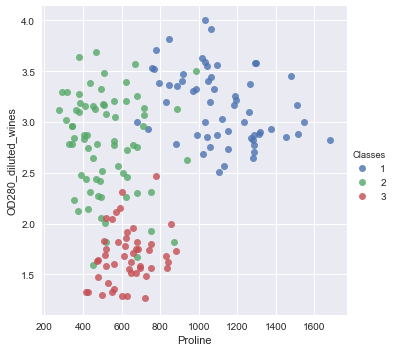

In [60]:
sns.lmplot('Proline', 'OD280_diluted_wines', dat, hue='Classes', fit_reg=False)

### 2. Classification

#### First divide the data using the holdout partition (67% training and 34% testing).  

 Here we will split the data into training and test sets with stratified sampling since we have different totals for each class:

In [38]:
np.unique(classes, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48], dtype=int64))

The data is split using the normalized data which will be used for the knn classifier, and the original data which will be used for the decision tree and Naive Bayes models

In [11]:
from sklearn.model_selection import train_test_split

X_train_dat, X_test_dat, y_train_dat, y_test_dat = train_test_split(data, classes, test_size=.34, random_state=43, stratify=classes)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, classes, test_size=.34, random_state=21, stratify=classes)

In [45]:
X_train.shape

(117L, 13L)

In [47]:
y_train.shape

(117L,)

In [49]:
X_test.shape

(61L, 13L)

In [50]:
y_test.shape

(61L,)

### Decision Tree
#### i.	What are the parameters that you used for building the decision tree and which parameter configuration gave you the best performance?


Using the sklearn decision tree, I tried both entropy and gini scores for criterion. For the first model I used the default parameters - default depth in sklearn is none, the tree splits until all nodes are pure or less than the min_samples specified (default is 2 for min_samples_split).

For the second model I used max_depth = 1, max_leaf_nodes = 3, min_samples_split = 2. 



#### Using Entropy and specified parameters

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
dectree = DecisionTreeClassifier(criterion='entropy', random_state=23)
dfit_1 = dectree.fit(X_train_dat, y_train_dat)

Model 1 on the training data using default parameters:

In [63]:
expected_def = y_train_dat
predicted_def = dectree.predict(X_train_dat)
print(metrics.classification_report(predicted_def, expected_def))
print "\n"
print(metrics.confusion_matrix(predicted_def, expected_def))
print "\n"
print "The accuracy score for the training data gives us:{0:.4f}".format(accuracy_score(expected_def, predicted_def))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        39
          2       1.00      1.00      1.00        47
          3       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00       117



[[39  0  0]
 [ 0 47  0]
 [ 0  0 31]]


The accuracy score for the training data gives us:1.0000


Model 1 on the test data using default parameters:

In [66]:
expected_def_test = y_test_dat
predict_def_test = dectree.predict(X_test_dat)
print(metrics.classification_report(predict_def_test, expected_def_test))
print "\n"
print (metrics.confusion_matrix(predict_def_test, expected_def_test))
print "\n"
print "The accuracy score for the test data gives us:{0:.4f}".format(accuracy_score(expected_def_test, predict_def_test))

             precision    recall  f1-score   support

          1       0.95      0.86      0.90        22
          2       0.92      0.92      0.92        24
          3       0.88      1.00      0.94        15

avg / total       0.92      0.92      0.92        61



[[19  2  1]
 [ 1 22  1]
 [ 0  0 15]]


The accuracy score for the test data gives us:0.9180


Model 2 using specified parameters:

In [54]:
dectree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=23, max_leaf_nodes=5, min_samples_split=4)
dfit = dectree1.fit(X_train_dat, y_train_dat)

Model 2 Training Data:

In [55]:
expected = y_train_dat
predicted = dectree1.predict(X_train_dat)
print(metrics.classification_report(predicted, expected))
print "\n"
print(metrics.confusion_matrix(predicted, expected))
print "\n"
print "The accuracy score for the training data gives us:{0:.4f}".format(accuracy_score(expected, predicted))

             precision    recall  f1-score   support

          1       0.97      1.00      0.99        38
          2       0.81      1.00      0.89        38
          3       1.00      0.76      0.86        41

avg / total       0.93      0.91      0.91       117



[[38  0  0]
 [ 0 38  0]
 [ 1  9 31]]


The accuracy score for the training data gives us:0.9145


Model 2 Test Data using specified parameters:

In [53]:
expected_test = y_test_dat
predict_test = dectree1.predict(X_test_dat)
print(metrics.classification_report(predict_test, expected_test))
print "\n"
print (metrics.confusion_matrix(predict_test, expected_test))
print "\n"
print "The accuracy score for the test data gives us:{0:.4f}".format(accuracy_score(expected_test, predict_test))


             precision    recall  f1-score   support

          1       0.90      0.90      0.90        20
          2       0.75      1.00      0.86        18
          3       1.00      0.74      0.85        23

avg / total       0.89      0.87      0.87        61



[[18  2  0]
 [ 0 18  0]
 [ 2  4 17]]


The accuracy score for the test data gives us:0.8689


We can see that the decision tree is able to predict with very high accuracy for the training and test sets using the default values, while using the specified parameter values for model 2 were slightly lower, especially on the test set. class 1 on the test set shows high precision and recall while classes 2 and 3 are slightly lower, but still very accurate.

Below is a the visualized confusion matrix of the test predictions for Model 2:

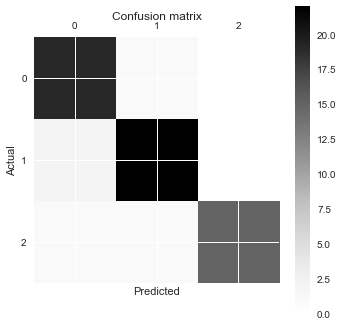

In [67]:
conf_matrix = metrics.confusion_matrix(expected_def_test, predict_def_test)
plt.matshow(conf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Gini

Model 3 uses the default sklearn values and Gini for the criterion

Using the gini score actually gives us a slightly better accuracy on the test set than entropy.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
dectree_gini = DecisionTreeClassifier(criterion='gini')
dfit = dectree_gini.fit(X_train_dat, y_train_dat)

Model 3 Training Data:

In [75]:
expected_gini_train = y_train_dat
predict_gini_train = dectree_gini.predict(X_train_dat)
print(metrics.classification_report(expected_gini_train, predict_gini_train))
print "\n"
conf_matrix = metrics.confusion_matrix(expected_gini_train, predict_gini_train)
print(conf_matrix)
print "\n"
print "The accuracy score for the training data gives us:{0:.4f}".format(accuracy_score(expected_gini_train, predict_gini_train))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        39
          2       1.00      1.00      1.00        47
          3       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00       117



[[39  0  0]
 [ 0 47  0]
 [ 0  0 31]]


The accuracy score for the training data gives us:1.0000


Model 3 Test Data:

In [77]:
expected_gini_test = y_test_dat
predict_gini_test = dectree.predict(X_test_dat)
print(metrics.classification_report(expected_gini_test, predict_gini_test))
conf_matrix = metrics.confusion_matrix(expected_gini_test, predict_gini_test)
print "\n"
print(conf_matrix)
print "\n"
print "The accuracy score for the test data gives us:{0:.4f}".format(accuracy_score(expected_gini_test, predict_gini_test))


             precision    recall  f1-score   support

          1       0.86      0.95      0.90        20
          2       0.92      0.92      0.92        24
          3       1.00      0.88      0.94        17

avg / total       0.92      0.92      0.92        61



[[19  1  0]
 [ 2 22  0]
 [ 1  1 15]]


The accuracy score for the test data gives us:0.9180


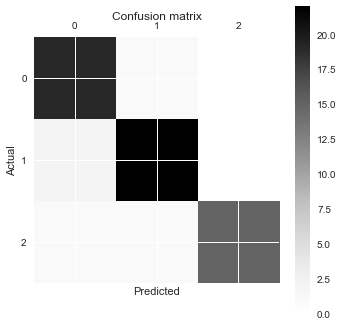

In [81]:
conf_matrix2 = metrics.confusion_matrix(expected_gini_test, predict_gini_test)
plt.matshow(conf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So we can see that the default settings using sklearn gave us a better accuracy here with (criterion=’gini’ or criterion='entropy', splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False), giving an accuracy on the training as a perfect score of 1.000 and an accuracy score on the test set of 0.9180. Another good way to examine multiple parameters would be to utilize GridSearchCV for testing a range of parameters in one run.

#### iii. Are there any assumptions on the distributions of the data that have to be made in order to apply a decision tree model? 

Yes, we have to assume that the training and test data are sampled from the same distribution to ensure accuracy. This is why a stratified sample is so important, the classes must be evenly distributed since the classes are unequal. 

###  Naive Bayes
#### i.	Accuracy results on both training and testing data


In [78]:
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [79]:
bclassifier = naive_bayes.GaussianNB()
bfitted = bclassifier.fit(X_train, y_train)
bayespredict = bfitted.predict(X_test)

In [80]:
#Performance Evaluation
confmatrix = confusion_matrix(y_test, bayespredict)
bayestrain_score = bfitted.score(X_train, y_train)
bayestest_score = bfitted.score(X_test, y_test)
print classification_report(y_test, bayespredict) 
print "\n Confusion Matrix \n", confmatrix, "\n"
print "Average accuracy is",  (bayestrain_score+bayestest_score)/2
print "Training score is %f" % bayestrain_score
print "Testing score is %f" % bayestest_score

             precision    recall  f1-score   support

          1       0.95      1.00      0.98        20
          2       1.00      0.92      0.96        24
          3       0.94      1.00      0.97        17

avg / total       0.97      0.97      0.97        61


 Confusion Matrix 
[[20  0  0]
 [ 1 22  1]
 [ 0  0 17]] 

Average accuracy is 0.983606557377
Training score is 1.000000
Testing score is 0.967213


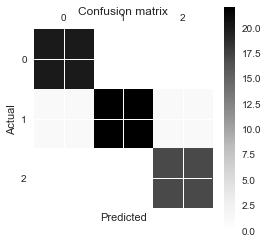

In [85]:
plt.matshow(confmatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### ii.	Naïve Bayes classifier makes certain assumptions about data. State these assumptions and check if these assumptions are satisfied.
Naive Bayes assumes the data is independent and normally distributed. From the corr plot we can see that there are values that seem to be correlated which would not meet the assumption of independence. As stated in the exploratory analysis we can see that a few variables are somewhat correlated: Proline being very positively correlated with Alcohol, Total Phenols is highly correlated with Flavanoids and OD280 Diluted Wines.

In [82]:
dat.corr()

,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonfavanoid_phenols,Proanthocyanins,Color Intensity,Hue,OD280_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonfavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### K-Nearest Neighbor
####    i.	Accuracies results on both training and testing data for values of k equal to 1

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))


Test set predictions:
 [2 3 2 3 2 1 3 3 2 1 2 1 1 1 1 1 3 1 1 2 3 2 3 3 2 2 3 1 1 3 1 3 2 3 2 2 1
 2 1 1 1 2 2 2 1 1 3 3 2 3 3 2 3 1 3 1 2 3 1 1 1]


In [27]:
knn1.score(X_test, y_test)

0.91803278688524592

In [28]:
knn1.score(X_train, y_train)

1.0

#### Accuracies results on both training and testing data for values of k equal to 3

In [24]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 3 2 3 2 1 3 3 2 1 2 1 1 2 1 1 3 1 1 2 3 2 3 3 2 2 3 1 1 3 1 3 2 3 2 2 1
 2 1 1 1 2 2 2 1 1 3 3 2 3 3 2 3 1 3 1 2 3 1 1 2]


In [25]:
knn3.score(X_test, y_test)

0.95081967213114749

#### Accuracies results on both training and testing data for values of k equal to 5

In [26]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 3 2 3 2 1 3 3 2 1 2 1 1 2 1 1 3 1 1 2 3 2 3 3 2 2 3 1 1 3 1 3 2 3 2 2 1
 2 1 1 1 2 2 2 1 1 3 3 2 3 3 2 3 1 3 1 2 3 1 1 2]


In [27]:
knn5.score(X_test, y_test)

0.95081967213114749

The default similarity measure that is used in sklearn KNeighorsClassifier is the Euclidean Distance. There was a need to normalize the data due to the fact that there were large discrepancies in the scales of measurement of the data. Some of the data had very large measurements compared to smaller measurements for most of the data. Normalizing the data removed this potential bias.